<a href="https://colab.research.google.com/github/alyssarose05/ecommerce-analysis/blob/main/Kids_Pools_For_Backyard_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Kids Pools For Backyard" Sales Data Analysis

## Import necessary libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for changing numerical columns
import warnings
warnings.filterwarnings('ignore')

## Preview raw data

In [ ]:
# Import the keyword dataset
raw_df = pd.read_csv('/content/drive/MyDrive/Build Fellowship/June 2025/Alyssa Ayala/Kids Pools For Backyard Helium 10 Export.csv')

# Read all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# View the first few rows
raw_df.head(3)

,Display Order,Product Details,ASIN,URL,Image URL,Brand,Price $,Parent Level Sales,ASIN Sales,Recent Purchases,Parent Level Revenue,ASIN Revenue,Title Char. Count,BSR,Seller Country/Region,Fees $,Active Sellers,Ratings,Review Count,Images,Review velocity,Buy Box,Category,Size Tier,Fulfillment,Dimensions,Weight,ABA Most Clicked,Creation Date,Sponsored,Best Seller,Seller Age (mo),Seller
0,1.0,"12Pcs Reusable Water Balloons, Pool Toys for B...",B0BV9J36P5,https://www.amazon.com/dp/B0BV9J36P5?psc=1,https://m.media-amazon.com/images/I/71CPScb9FN...,Kikidex,27.99,"3,700","3,036","5,000","124,541.15","93,526.1",152,573,CN,9.50,1,4.7,489,10,24.0,Kikidex,Toys & Games,Large Standard-Size,FBA,13.15 x 0.79 x 9.17 in,0.88,NaN,"Feb 8, 2023",Sponsored Brand Video,No,28,Kikidex
1,2.0,($) Extra Large Inflatable Pool for Kids Adult...,B0F9KQ81DR,https://www.amazon.com/dp/B0F9KQ81DR?psc=1,https://m.media-amazon.com/images/I/71UeAt732O...,bailinghai,89.99,363,361,300,"32,848.13","32,648.18",199,"16,417",CN,26.29,2,4.5,22,6,20.0,bailinghai outdoor brand,Toys & Games,Large Standard-Size,FBA,17.68 x 7.01 x 13.19 in,18.24,NaN,"May 26, 2025",Sponsored,No,1,bailinghai outdoor brand
2,3.0,"($) Foldable Dog Pool, 63"" x 12"" Kiddie Pool w...",B0CX9BFQ29,https://www.amazon.com/dp/B0CX9BFQ29?psc=1,https://m.media-amazon.com/images/I/71Q3XHuhYT...,CACSPS,44.99,"7,789",678,900,"309,970.4","30,329.05",159,963,CN,15.76,1,4.6,"1,057",6,NaN,CACSPS STORE,Pet Supplies,Large Standard-Size,FBA,13.82 x 7.56 x 11.38 in,10.14,NaN,"Mar 6, 2024",Sponsored,Yes,15,CACSPS STORE


In [ ]:
# Gather basic information about the data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Display Order          144 non-null    float64
 1   Product Details        144 non-null    object 
 2   ASIN                   144 non-null    object 
 3   URL                    144 non-null    object 
 4   Image URL              144 non-null    object 
 5   Brand                  144 non-null    object 
 6   Price  $               144 non-null    object 
 7   Parent Level Sales     144 non-null    object 
 8   ASIN Sales             144 non-null    object 
 9   Recent Purchases       137 non-null    object 
 10  Parent Level Revenue   144 non-null    object 
 11  ASIN Revenue           144 non-null    object 
 12  Title Char. Count      144 non-null    int64  
 13  BSR                    144 non-null    object 
 14  Seller Country/Region  93 non-null     object 
 15  Fees  

## Modify columns

In [ ]:
# Drop unneeded columns
filtered_df = raw_df.drop(columns = ['Display Order', 'URL', 'Image URL',
                                     'Parent Level Sales', 'Parent Level Revenue', 'Seller Country/Region',
                                     'Buy Box', 'Category', 'Dimensions', 'Weight', 'ABA Most Clicked',
                                     'Creation Date', 'Sponsored'
                                     ])

# Modify column names
filtered_df.rename(columns = {
    'Price  $': 'Price ($)',
    'Fees  $': 'Fees ($)',
    'ASIN Revenue': 'ASIN Revenue ($)',
    'Review velocity': 'Review Velocity'
}, inplace = True)

# Confirm the column changes
filtered_df.columns

Index(['Product Details', 'ASIN', 'Brand', 'Price ($)', 'ASIN Sales',
       'Recent Purchases', 'ASIN Revenue ($)', 'Title Char. Count', 'BSR',
       'Fees ($)', 'Active Sellers', 'Ratings', 'Review Count', 'Images',
       'Review Velocity', 'Size Tier', 'Fulfillment', 'Best Seller',
       'Seller Age (mo)', 'Seller'],
      dtype='object')

In [ ]:
numeric_columns = ['Price ($)', 'ASIN Sales', 'Recent Purchases', 'ASIN Revenue ($)', 'BSR',
                   'Fees ($)', 'Active Sellers', 'Ratings', 'Review Count', 'Images',
                   'Review Velocity', 'Seller Age (mo)']

# Function to fix numeric columns
for column in numeric_columns:
  filtered_df[column] = filtered_df[column].astype(str).str.replace(',', '') # No commas in numbers
  filtered_df[column] = pd.to_numeric(filtered_df[column], errors='coerce') # Convert to numeric
  filtered_df[column] = filtered_df[column].fillna(0) # Fill missing values with 0

# View basic info about the filtered data
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product Details    144 non-null    object 
 1   ASIN               144 non-null    object 
 2   Brand              144 non-null    object 
 3   Price ($)          144 non-null    float64
 4   ASIN Sales         144 non-null    int64  
 5   Recent Purchases   144 non-null    float64
 6   ASIN Revenue ($)   144 non-null    float64
 7   Title Char. Count  144 non-null    int64  
 8   BSR                144 non-null    int64  
 9   Fees ($)           144 non-null    float64
 10  Active Sellers     144 non-null    int64  
 11  Ratings            144 non-null    float64
 12  Review Count       144 non-null    int64  
 13  Images             144 non-null    int64  
 14  Review Velocity    144 non-null    float64
 15  Size Tier          144 non-null    object 
 16  Fulfillment        144 non

In [ ]:
# Drop any duplicate ASINs, meaning duplicate listings
filtered_df.drop_duplicates(subset = 'ASIN', inplace = True)

# Preview final dataframe
filtered_df.head(3)

,Product Details,ASIN,Brand,Price ($),ASIN Sales,Recent Purchases,ASIN Revenue ($),Title Char. Count,BSR,Fees ($),Active Sellers,Ratings,Review Count,Images,Review Velocity,Size Tier,Fulfillment,Best Seller,Seller Age (mo),Seller
0,"12Pcs Reusable Water Balloons, Pool Toys for B...",B0BV9J36P5,Kikidex,27.99,3036,5000.0,93526.10,152,573,9.50,1,4.7,489,10,24.0,Large Standard-Size,FBA,No,28,Kikidex
1,($) Extra Large Inflatable Pool for Kids Adult...,B0F9KQ81DR,bailinghai,89.99,361,300.0,32648.18,199,16417,26.29,2,4.5,22,6,20.0,Large Standard-Size,FBA,No,1,bailinghai outdoor brand
2,"($) Foldable Dog Pool, 63"" x 12"" Kiddie Pool w...",B0CX9BFQ29,CACSPS,44.99,678,900.0,30329.05,159,963,15.76,1,4.6,1057,6,0.0,Large Standard-Size,FBA,Yes,15,CACSPS STORE


In [ ]:
# Save preprocessed data as CSV
filtered_df.to_csv('preprocessed_data.csv', index = False)

## Perform Data Analysis

In [ ]:
# View statistics about the data
filtered_df.describe()

,Price ($),ASIN Sales,Recent Purchases,ASIN Revenue ($),Title Char. Count,BSR,Fees ($),Active Sellers,Ratings,Review Count,Images,Review Velocity,Seller Age (mo)
count,126.000000,126.000000,126.000000,1.260000e+02,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,90.209048,1932.960317,1694.444444,1.212315e+05,156.515873,6516.420635,29.701349,3.333333,4.324603,3725.642857,7.404762,48.912698,49.079365
std,195.254425,2980.207194,2844.701898,2.199069e+05,39.343967,8452.408504,59.437364,6.064981,0.248736,7942.013509,1.470666,71.679400,61.670817
min,11.690000,18.000000,0.000000,9.044900e+02,38.000000,4.000000,0.000000,1.000000,3.500000,8.000000,2.000000,0.000000,1.000000
25%,32.115000,413.500000,400.000000,2.720253e+04,133.500000,1085.500000,11.747500,1.000000,4.200000,82.750000,6.000000,10.250000,5.250000
50%,49.990000,963.500000,900.000000,5.545674e+04,166.500000,3070.000000,17.195000,1.000000,4.300000,462.500000,7.000000,26.500000,19.000000
75%,89.990000,2165.000000,2000.000000,1.131171e+05,190.750000,8096.750000,26.180000,3.000000,4.500000,3558.750000,8.000000,62.750000,65.250000
max,2029.990000,23774.000000,20000.000000,1.510100e+06,203.000000,45360.000000,583.800000,50.000000,5.000000,44914.000000,12.000000,508.000000,241.000000


- Biggest column: `ASIN Revenue` (1.510100e+06)
- Smallest column: `Ratings` (5)

Notable `mean` kids' swimming pool stats:
- Cost around $90 (prices may vary based on size tier)
- Around 4.3 star rating (customers are typically satisfied enough)
- ~157 title characters (more details are better than less)
- ~7 images (more images are better than less)

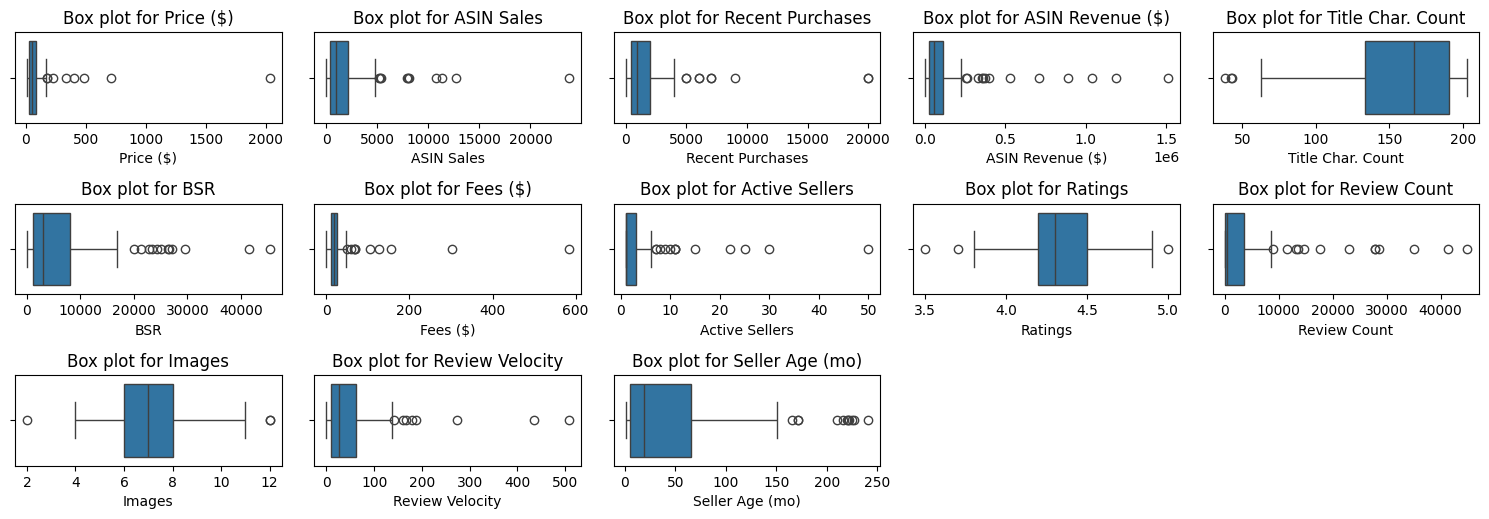

In [ ]:
# Select numerical columns
numerical_columns = filtered_df.select_dtypes(include=[np.number]).columns

# Box plots layout
plt.figure(figsize=(15, 10))

# For-loop to make box plots for numerical columns
for i, column in enumerate(numerical_columns):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(data=filtered_df, x=column)
    plt.title(f'Box plot for {column}')

# Combine box plots and show results
plt.tight_layout()
plt.show()

The majority of boxes are towards the middle. Some key notes:
- `Price ($)` and `Fees ($)`: Narrow box; very easy to be an outlier.
- Boxes in `Ratings` and `Images` are more towards the middle than the others.
- The only time the box is towards the right is for "Box plot for Title Char. Count."

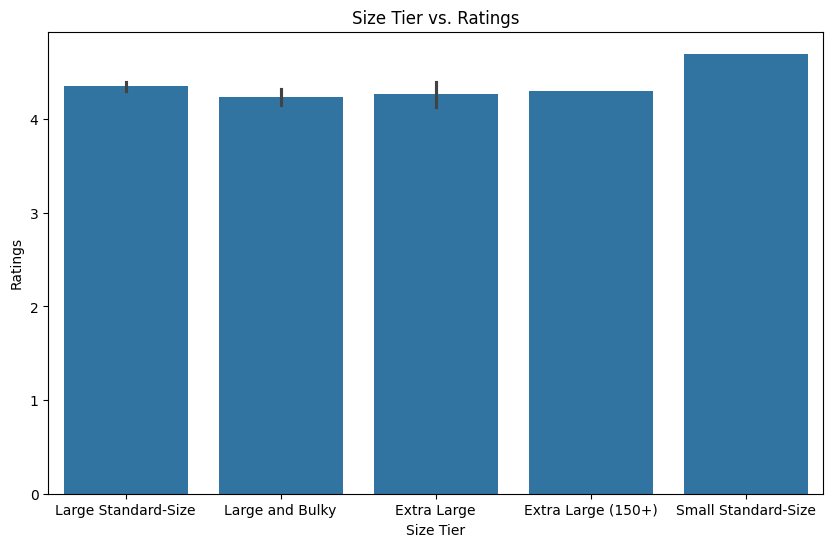

In [ ]:
# Bar graph of size tier vs ratings
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x='Size Tier', y='Ratings')
plt.title('Size Tier vs. Ratings')
plt.xlabel('Size Tier')
plt.ylabel('Ratings')
plt.show()

The average ratings are around 4 stars regardless of the swimming pool size, but...
*   The Small Standard-Size is higher up than the other sizes, giving it more potential to do better than larger pools. This could have to do with the pool's _light weight_ and _ease of set-up._

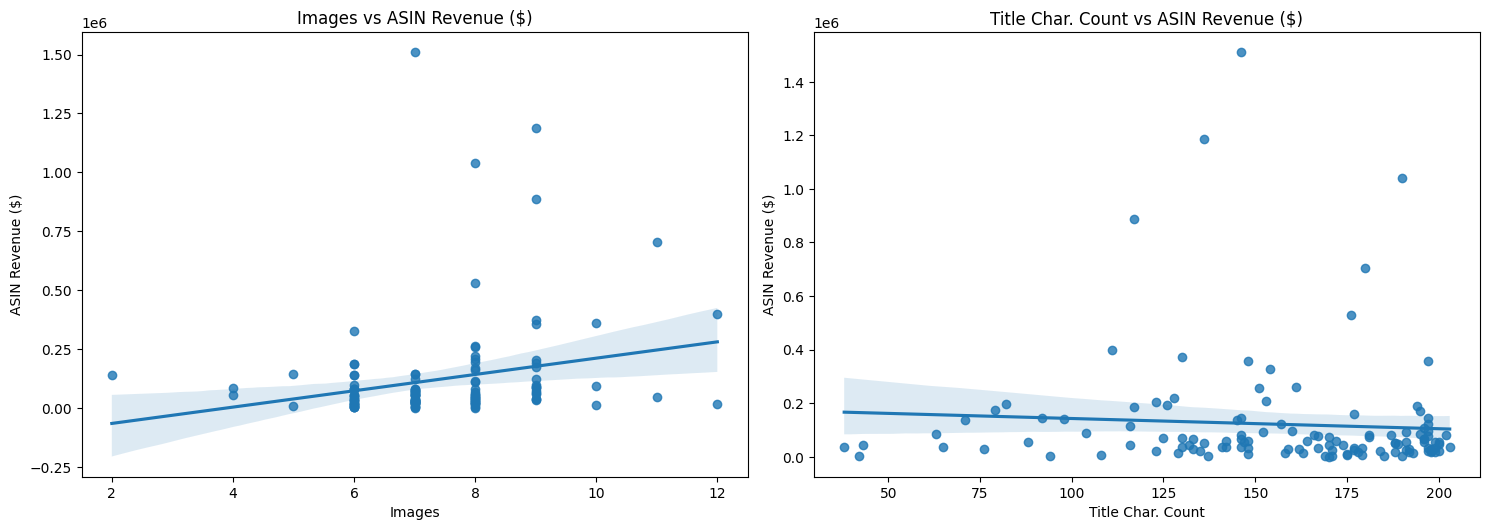

In [ ]:
# Information to make scatter plots on revenue on image and title char. count
x_vars = ['Images', 'Title Char. Count']
y_var = 'ASIN Revenue ($)'

# Box plots layout
plt.figure(figsize=(15, 10))

# For-loop to make box plots for numerical columns
for i, column in enumerate(x_vars):
    plt.subplot(2, 2, i + 1)
    sns.regplot(data=filtered_df, x=column, y=y_var)
    plt.title(f'{column} vs {y_var}')

plt.tight_layout()
plt.show()

*   More images contribute to a higher ASIN revenue.
*   On the other hand, longer product titles make the ASIN revneue go down.

**What should these companies put on their Amazon listings?**
*   _More_ images to visualize the product with _consise_ product descriptions.

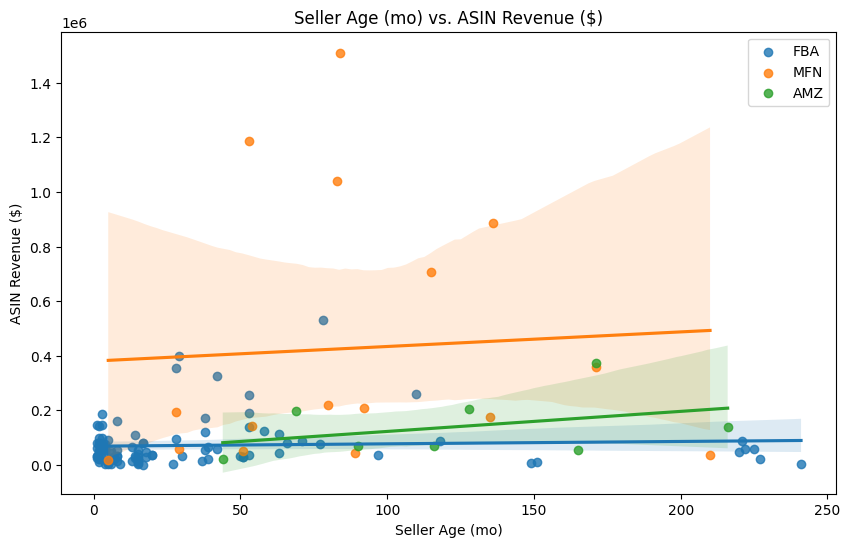

In [ ]:
# Seller Age (pools trending in the summer) vs. revenue

# State plot size
plt.figure(figsize=(10, 6))

# Plot the scatter plot
for fulfillment_type in filtered_df['Fulfillment'].unique():
  subset_df = filtered_df[filtered_df['Fulfillment'] == fulfillment_type]
  sns.regplot(data = subset_df, x = 'Seller Age (mo)', y = 'ASIN Revenue ($)', label = fulfillment_type)

# Add title and labels
plt.title('Seller Age (mo) vs. ASIN Revenue ($)')
plt.legend()
plt.show()

All three fulfillment methods slowly increase as the seller age increases. The main difference is with the MFN's (Merchant Fulfillment Network) revenue _quantity_, which is not managed by Amazon unlike FBA (Fulfilled by Amazon) and AMZ (Amazon brand). This gives MFN products the ability to put their own prices and fees that are not subject to the discounts from the Amazon Prime subscription.

If you want to sell a product long-term, fulfilling sales on your own via Shopify or your own website may be ideal.
